#**CIS 419/519**

## Support Vector Machines (SVM) worksheet 

In this notebook, two examples for support vector machines (SVMs) are provided. In the first example, you will use the `sklearn`'s svm module with linear kernel to plot maximum margin hyperplane for a linearly separable data. In the second example, since the data is linearly inseparable, you will explore the use of different kernels to plot decision boundaries for IRIS dataset. More info on SVM functionality in `sklearn` can be found [here](https://scikit-learn.org/stable/modules/svm.html#svm). 

---
## Example 1 - Obtaining the maximum margin separating hyperplane

In this example, we use a two-class 2D linearly separable dataset and plot the maximum margin separating hyperplane. The example is adapted from [here](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)


Let's import the required packages first.


In [1]:
#Import numpy
import numpy as np

#Import matplotlib for plotting
import matplotlib.pyplot as plt

#Import the required sklearn libraries 
from sklearn.datasets import make_blobs

Create an artificial dataset having 40 points equally divided among 2 classes

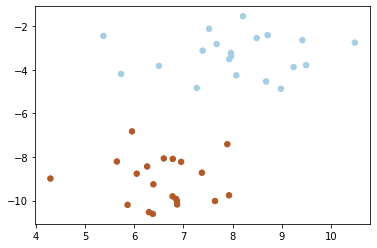

In [4]:
# we create 40 separable points in 2 groups or "clusters" using the make_blobs() function
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

#Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

Fit the model with linear kernel and plot the decision boundary. Notice the fit hyperplane has the maximum margin possible, i.e. it is as far as it can be from any datapoints. The support vectors, i.e. points that influence the decision plane's positioning, are circled as well in the plot below.

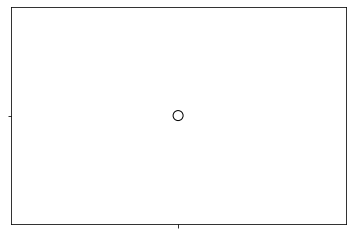

In [5]:
from sklearn import svm
# TODO: fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

#plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# TODO: plot support vectors - we can get these from the trained clf model
ax.scatter(___, ___ , s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

---
## Example 2 - Exploring different kernels for SVMs with `sklearn`

In this example, we explore the different types of kernel options available for the `svm.SVC` function within the `sklearn` library, namely `'linear'`, `'poly'` (polynomial) and `'rbf'` (radial basis function, also called the Gaussian kernel). This example is adapted from [here](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py).

---
First, we load the required packages. In particular, we load the `svm` library from `sklearn`.

In [ ]:
# Import numpy
import numpy as np

# Import libraries from sklearn
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

# Import matplotlib for plotting
import matplotlib.pyplot as plt

Next, we load the IRIS dataset, perform some pre-processing of the data, and split the data into training and test data.

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Perform some data pre-processing
X = X[y != 0, :2]
y = y[y != 0]

# Split 10% of the data to use as test points and the rest as training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


Next, we use `svm.SVC` function and three different kernel options (`'linear'`, `'rbf'` and `'poly'`) to fit a SVM model based on the given dataset. For each kernel option, we then plot a scatterplot of datapoints, together with the decision boundaries.

Observe that while the rbf kernel is able to fit the training data better than the linear or polynomial kernel, it may lead to overfitting and that may lead to poor performance/accuracy with test data (circled in the scatterplot). One option to know which kernel to pick (or which degree for polynomial kernels) is to use cross-validation.

In [ ]:
# Create three different models of SVM with different kernels and plot the decision boundaries on the data
for kernel in ('linear', 'poly', 'rbf'):
    # TODO: Create and train the SVM with a specific kernel
    clf = 

    # Plot the dataset
    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Produce a grid for the decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()